## Bank Marking Prediction

The dataset is a collection of information related to a marketing campaign, likely in the context of financial services or a similar industry. Each entry in the dataset represents an individual customer and includes various features such as age, job, marital status, education, and more. The goal of the analysis is to predict whether a customer will make a purchase based on the provided features.

Key columns in the dataset include demographic information like age, employment details, and marital status, as well as financial indicators such as default status, housing situation, and loan status. The temporal aspects of the campaign, such as the month and day of the week of the last contact, are also included. Additionally, there are indicators related to the previous marketing campaign, such as the number of contacts and outcomes.

The target variable, "Purchase," is binary and indicates whether the customer made a purchase following the marketing campaign (yes) or not (no). This dataset is suitable for predictive modeling tasks, and the objective is to build a model that accurately predicts whether a customer is likely to make a purchase based on the provided features. Potential machine learning algorithms, such as classification models, can be applied to achieve this predictive goal.

In [24]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (13, 5)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, recall_score, classification_report

### importing the data

In [25]:
banking_data=pd.read_excel("Banking data.xlsx")
banking_data.head()

,age,job,marital status,education,default,housing,loan,contact,Mondayth,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Purchase
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,55,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,54,management,married,basic.4y,unknown,yes,no,telephone,may,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,54,blue-collar,divorced,basic.4y,no,no,no,telephone,may,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


age: Age of the customer.

job: Occupation or job category of the customer.

marital status: Marital status of the customer (e.g., married, single, divorced).

education: Educational level of the customer.

default: Whether the customer has credit in default (yes, no).

housing: Housing situation of the customer (e.g., own, rent).

loan: Whether the customer has a personal loan (yes, no).

contact: Contact communication type (e.g., cellular, telephone).

month: Last contact month of the year.

day_of_week: Last contact day of the week.

duration: Duration of the last contact in seconds. Note: including this attribute might lead to data leakage, as the duration is not known before making the call.

campaign: Number of contacts performed during this campaign for this customer.

pdays: Number of days that passed by after the customer was last contacted from a previous campaign.

previous: Number of contacts performed before this campaign for this customer.

poutcome: Outcome of the previous marketing campaign.

emp.var.rate: Employment variation rate - quarterly indicator.

cons.price.idx: Consumer price index - monthly indicator.

cons.conf.idx: Consumer confidence index - monthly indicator.

euribor3m: Euribor 3-month rate - daily indicator.

nr.employed: Number of employees - quarterly indicator.

Purchase: The target variable, indicating whether the customer made a purchase (yes, no).

Changing Categorical data to Numerical

### Data Cleaning and Pre-processing

In [26]:
banking_data.drop(columns=["contact", "marital status", "Mondayth", "day_of_week", "education", "job"], inplace=True)

In [27]:
default_mapping = {'yes': 1, 'no': 0, 'unknown': 3}
banking_data['default'] = banking_data['default'].map(default_mapping)

In [28]:
housing_mapping = {'yes': 1, 'no': 0, 'unknown': 3}
banking_data['housing'] = banking_data['housing'].map(housing_mapping)

In [29]:
loan_mapping = {'yes': 1, 'no': 0, 'unknown': 3}
banking_data['loan'] = banking_data['loan'].map(loan_mapping)

In [30]:
poutcome_mapping = {'success': 1, 'failure': 0, 'nonexistent': 2}
banking_data['poutcome'] = banking_data['poutcome'].map(poutcome_mapping)

In [31]:
banking_data['pdays'].replace(999, 30, inplace=True)

In [32]:
banking_data.head()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Purchase
0,56,0,0,0,261,1,30,0,2,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0,1,0,293,1,30,0,2,1.1,93.994,-36.4,4.857,5191.0,no
2,55,3,1,0,262,1,30,0,2,1.1,93.994,-36.4,4.857,5191.0,no
3,54,3,1,0,230,1,30,0,2,1.1,93.994,-36.4,4.857,5191.0,no
4,54,0,0,0,208,1,30,0,2,1.1,93.994,-36.4,4.857,5191.0,no


### Model Building

In [33]:
x = banking_data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
y = banking_data['Purchase']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model.predict(x_test)

array(['no', 'no', 'yes', ..., 'yes', 'no', 'no'], dtype=object)

### Checking for Feature importance

Feature importance is a concept used in machine learning to understand the contribution of different features (variables or attributes) in a predictive model. It helps to identify which features are most influential in making predictions and provides insights into the underlying patterns within the data. 

In [35]:
feature_importance = model.feature_importances_
for feature, importance in zip(x_train.columns, feature_importance):
    print(f"{feature}: {importance}")

age: 0.2776381877336649
duration: 6.903228102091634e-06
campaign: 0.12263185675664304
pdays: 0.06066942440689648
previous: 0.035634367702063914
emp.var.rate: 0.004892493831322016
cons.price.idx: 0.018363780037984317
cons.conf.idx: 0.03227090015373044
euribor3m: 0.21584574359790906
nr.employed: 0.23204634255168377


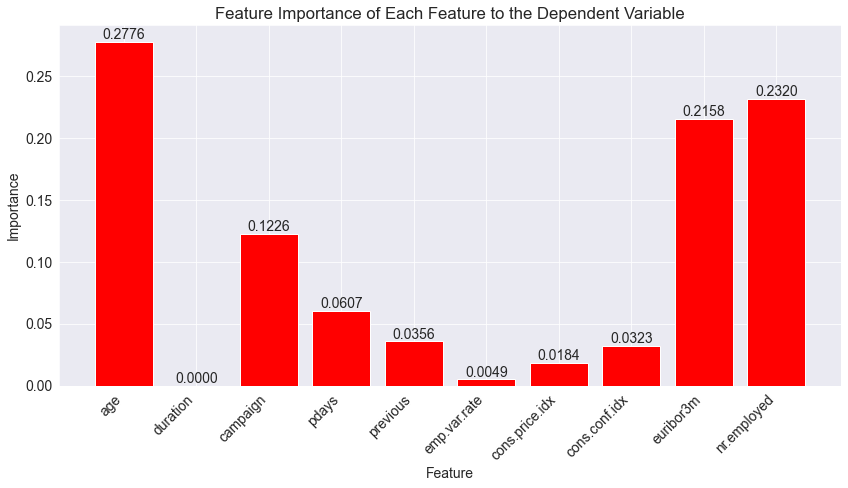

In [36]:
plt.figure(figsize=(12, 7))
bars = plt.bar(x_train.columns, feature_importance, color='red')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha="right")
plt.title("Feature Importance of Each Feature to the Dependent Variable")
for bar, value in zip(bars, feature_importance):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

 Here's an interpretation of the feature importances along with possible reasons for their values:

1. **Age: 0.278**
   - Interpretation: Age is the most important feature, contributing significantly to the model's decision-making.
   - Possible Reason: It suggests that the age of the person has a substantial impact on whether they subscribe to the product or service represented by your target variable. This could be due to different preferences, behaviors, or financial situations across age groups.

2. **Duration: 6.90e-06**
   - Interpretation: Duration has a very low importance, almost negligible.
   - Possible Reason: In many cases, the duration of a call might be highly correlated with the outcome (e.g., longer calls might result in a positive outcome), but using it for prediction might lead to overfitting or capturing noise.

3. **Campaign: 0.123**
   - Interpretation: The number of contacts during this campaign is moderately important.
   - Possible Reason: It suggests that the frequency of contact during the current campaign plays a role in the decision. Too many contacts might be perceived negatively by clients.

4. **Pdays: 0.061**
   - Interpretation: The number of days that passed after the client was last contacted is moderately important.
   - Possible Reason: It implies that the recency of contact is relevant. Clients might respond differently based on how long ago they were last contacted.

5. **Previous: 0.036**
   - Interpretation: The number of contacts performed before this campaign is somewhat important.
   - Possible Reason: Previous interactions with the client might influence their decision in the current campaign. For example, a positive response in the past might increase the likelihood of a positive response again.

6. **Emp.var.rate: 0.005**
   - Interpretation: Employment variation rate has a low importance.
   - Possible Reason: Economic conditions, as represented by the employment variation rate, might have a limited impact on the specific outcome being predicted.

7. **Cons.price.idx: 0.018**
   - Interpretation: Consumer price index has a low to moderate importance.
   - Possible Reason: It suggests that the consumer price index contributes, but not as much as some other features. Changes in the price index might influence consumer behavior to some extent.

8. **Cons.conf.idx: 0.032**
   - Interpretation: Consumer confidence index is moderately important.
   - Possible Reason: The level of consumer confidence might influence their decisions, with higher confidence potentially leading to more positive outcomes.

9. **Euribor3m: 0.216**
   - Interpretation: The three-month Euribor rate is highly important.
   - Possible Reason: The Euribor rate, being an interest rate indicator, likely plays a crucial role in determining the outcome. Changes in interest rates can significantly affect financial decisions.

10. **Nr.employed: 0.232**
    - Interpretation: The number of employees is highly important.
    - Possible Reason: The size of the employed population might be indicative of overall economic conditions and could strongly influence the outcome.

These interpretations are based on the assumption that the feature importances are calculated correctly and that the model is well-fitted to the data. Additionally, domain knowledge and context about the specific problem can provide deeper insights into the meaning of these feature importances.

In [37]:
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, recall_score, classification_report
y_predicted=model.predict(x_test)
confusion_mat=pd.DataFrame(confusion_matrix(y_test, y_predicted))
confusion_mat.index=['will not make purchase', 'predicted will purchase']
confusion_mat.columns=['predicted will not purchase', 'predicted will purchase']
confusion_mat

,predicted will not purchase,predicted will purchase
will not make purchase,6911,369
predicted will purchase,681,277


In [38]:
accuracy=accuracy_score(y_test, y_predicted)
print('The accuracy score of our model is:', accuracy)

The accuracy score of our model is: 0.8725418790968682


In [44]:
sample_predict

,0
0,no
1,no
2,yes
3,no
4,no
5,no
6,no
7,no
8,no
9,no


In [53]:
sample_data=x_test.sample(10)
y_pred_sample=model.predict(sample_data)
sample_data['y_pred_sample']=y_pred_sample
sample_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_pred_sample
213,60,266,2,30,0,1.1,93.994,-36.4,4.855,5191.0,no
32612,31,266,1,30,0,1.4,93.444,-36.1,4.963,5228.1,no
11437,35,266,6,30,1,-1.8,92.893,-46.2,1.313,5099.1,no
25242,35,266,1,30,0,-0.1,93.200,-42.0,4.223,5195.8,no
29113,42,266,1,30,0,1.4,94.465,-41.8,4.864,5228.1,no
34458,47,266,1,30,1,-0.1,93.200,-42.0,4.120,5195.8,no
6901,39,266,2,30,0,1.1,93.994,-36.4,4.856,5191.0,no
24117,43,266,3,30,0,1.4,93.918,-42.7,4.968,5228.1,no
14073,57,266,2,30,0,1.1,93.994,-36.4,4.857,5191.0,no
4334,39,266,1,30,0,1.1,93.994,-36.4,4.855,5191.0,no


Age: 60
Duration: 266
Campaign: 2
Pdays: 30
Previous: 0
Emp.var.rate: 1.1
Cons.price.idx: 93.994
Cons.conf.idx: -36.4
Euribor3m: 4.855
Nr.employed: 5191.0
Predicted Outcome: 'no'
For the second row (index 32612):

Age: 31
Duration: 266
Campaign: 1
Pdays: 30
Previous: 0
Emp.var.rate: 1.4
Cons.price.idx: 93.444
Cons.conf.idx: -36.1
Euribor3m: 4.963
Nr.employed: 5228.1
Predicted Outcome: 'no'
The interpretation is based on the features and the predicted outcome. In both cases, the predicted outcome is 'no', suggesting that the model predicts that these instances are not likely to result in the positive class, whatever that class represents in your specific problem (e.g., subscription to a service, purchase, etc.).